# 클래스로 신경망 구현, 오차역 전파법

- 학습 알고리즘 구현하기
  - 신경망 학습의 순서를 확인해보자
    - 전제 : 신경망에는 적응 가능한 가중치와 편향이 이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 학습이라고 한다. 신경망 학습은 다음과 같이 4단계로 수행된다.
    - 1) 미니배치 : 훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표이다.
    - 2) 기울기 산출 : 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실함수의 값을 가장 작게 하는 방향을 제시한다. 
    - 3) 매개변수 갱신 : 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.
    - 4) 반복  : 1~3단계를 반복한다.
  - 이것이 신경망 학습이 이루어지는 순서이다. 이는 경사 하강법으로 매개변수를 갱신하는 방법이며, 이때 데이터를 미니배치로 무작위로 선정하기 때문에 확률적 경사 하강법이라고 부른다. (이하 SGD) 확률적으로 무작위로 골라낸 데이터에 대해 수행하는 경사 하강법이라 의미이다.
- 실제로 손글씨 숫자를 학습하는 신경망을 구현해보자
- 여기에서는 2층 신경망(은닉층이 1개인 네트워크)을 대상으로 MNIST 데이터셋을 사용하여 학습을 수행한다.
- 처음에는 2층 신경망을 하나의 클래스로 구현하는 것부처 시작한다. 
- 이 클래스의 이름은 TwoLayerNet이다.

In [2]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

- 앞에서 다룬 신경망의 순전파 처리 구현과 공통되는 부분이 많고, 새로운 내용은 딱히 없다.
- 우선 이 클래스가 사용하는 변수와 메서드를 정리해보자
  - 중요해보이는 것 일부만 작성하였으며 그 외의 것은 139p를 참고하자
    - params : 신경망의 매개변수를 보관하는 딕셔너리 변수(인스턴스 변수)
    - grads : 기울기 보관하는 딕셔너리 변수 (numerical_gradient() 메서드의 반환 값)
  - TwoLayerNet 클래스는 딕셔너리인 params와 grads를 인스턴스 변수로 갖는다. 
  - 자세한 내용은 해당 교재를 참고하자.
  - 예를 하나 살펴보자

In [4]:
net = TwoLayerNet(input_size = 784, hidden_size= 100, output_size= 10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


- 이와 같이 params 변수에는 이 신경망에 필요한 매개변수가 모두 저장된다. 그리고 params 변수에 저장된 가중치 매개변수가 예측 처리(순방향 처리)에서 사용된다. 참고로 예측 처리는 다음과 같이 실행할 수 있다.

In [6]:
x = np.random.rand(100,784) # 더미 입력 데이터 100장 분량
y = net.predict(x)

- grads 변수에는 params 변수에 대응하는 각 매개변수의 기울기가 저장된다. 예를 들어 다음과 같이 numericla_gradient() 메서드를 사용해 기울기를 계산하면 grads 변수에 기울기 정보가 저장된다. 

In [8]:
x = np.random.rand(100,784) # 더미 입력 데이터 (100장 분량)
t = np.random.rand(100,10) # 더미 정답 레이블 (100장 분량)

grads = net.numerical_gradient(x,t)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


- 이어서 TwoLayerNet 메서드를 살펴보자
  - 우선 __init__ : 메서드는 클래스를 초기화한다. (이 초기화 메서드는 TwoLayerNet을 생성할 때 불리는 메서드이다.)
  - 추가 : 신경망 학습은 시간이 오래 걸리니, 시간을 절약하려면 같은 결과를 훨씬 빠르게 얻을 수 있는 오차역전파법으로 각 매개변수의 손실 함수에 대한 기울기를 계산할 수 있다. 이는 다음장에서 학습할 것이다.

- 미니배치 학습 구현하기
  - 신경망 학습 구현에는 앞에서 설명한 미니배치 학습을 활용한다. 미니배치 학습이란 훈련 데이터 중 일부를 무작위로 꺼내고, 그 미니배치에 대해서 경사법으로 매개변수를 갱신한다. 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

- 여기서는 미니배치 크기를 100으로 했다. 즉, 매번 60000개의 훈련 데이터에서 임의로 100개의 데이터(이미지 데이터와 정답 레이블 데이터)를 추려낸다. 그리고 그 100개의 미니배치를 대상으로 확률적 경사 하강법을 수행해 매개변수를 갱신한다. 경사법에 의한 갱신 횟수(반복 횟수)를 10000번으로 설정하고 갱신할 때마다 훈련 데이터에 대한 손실함수를 계산하고 그 값을 배열에 추가한다.
- 학습 횟수가 늘어가면서 손실 함수의 값이 줄어들고 이는 학습이 잘 이루어지고 있다는 뜻으로 신경망의 가중치 매개변수가 서서히 데이터에 적응하고 있음을 의미한다. 신경망이 학습하고 있는 것이다. 다시 말해 데이터를 반복해서 학습함으로써 최적 가중치 매개변수로 서서히 다가가고 있는 것이다.

- 하지만 정확히는 훈련 데이터의 미니배치에 대한 손실 함수의 값이다. 훈련 데이터의 손실 함수 값이 작아지는 것은 잘 학습하고 있다는 방증이지만 이 결과만으로는 다른 데이터셋에서도 비슷한 실력을 발휘할지는 확실하지 않다. 
- 신경망 학습에서는 훈련 데이터 외의 데이터를 올바르게 인식하는지를 확인해여 한다. 다른 말로 오버피팅을 일으키지 않는지 확인해야 한다. 오비피팅 되었다는 것은 예를 들어 훈련 데이터 포함된 이미지만 제대로 구분하고 그렇지 않은 이미지는 식별할 수 없다는 뜻이다.
- 범용적인 능력의 평가를 위해, 훈련 데이터에 포함되지 않은 데이터를 사용해 평가해봐야 한다.
  - 이를 위해 다음 구현에서는 학습 도중 정기적으로 훈련 데이터와 시험 데이터를 대상으로 정확도를 기록한다. 여기에서는 1에폭별로 훈련 데이터와 시험 데이터에 대한 정확도를 기록한다. 
    - 에폭은 하나의 단위이다. 1에폭은 학습에서 훈련 데이터를 모두 소진했을 때의 횟수에 해당한다. 예컨대 훈련 데이터 10000개를 100개의 미니배치로 학습할 경우, 확률적 경사 하강법을 100회 반복하면 모든 훈련 데이터를 소진한게 된다. 이 경우 100회가 1에폭이 된다.

In [11]:
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.09915, 0.1009
train acc, test acc | 0.7825666666666666, 0.7853
train acc, test acc | 0.8771333333333333, 0.8807
train acc, test acc | 0.8981166666666667, 0.9014
train acc, test acc | 0.9082833333333333, 0.9104
train acc, test acc | 0.9147, 0.9171
train acc, test acc | 0.9193, 0.9215
train acc, test acc | 0.92455, 0.9265
train acc, test acc | 0.9277166666666666, 0.9291
train acc, test acc | 0.9313833333333333, 0.9322
train acc, test acc | 0.93445, 0.9348
train acc, test acc | 0.9368333333333333, 0.9367
train acc, test acc | 0.939, 0.9385
train acc, test acc | 0.9403666666666667, 0.9408
train acc, test acc | 0.9431666666666667, 0.942
train acc, test acc | 0.9448, 0.9435
train acc, test acc | 0.94635, 0.9451


- 이 예에서는 1에폭마다 모든 훈련 데이터와 시험 데이터에 대한 정확도를 계산하고 그 결과를 기록한다. 
- 정확도를 1에폭마다 계산하는 이유는 for문 앞에서 매번 계산하기에는 시간이 오래 걸리고 또 그렇게까지 자주 기록할 필요도 없기 때문이다. 
- 앞의 코드로 얻은 결과를 그래프로 그려보자

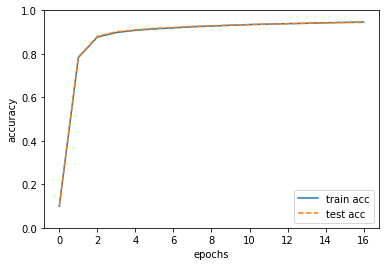

In [12]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

- 훈련 데이터에 대한 정확도를 실선으로 시험 데이터 에대한 정확도를 점선으로 그렸다. 보다시피 에폭이 진행될수록, 즉 학습이 진행될수록 훈련데이터와 시험데이터를 사용하고 평가한 정확도가 모두 좋아지고 있다. 또 두 정확도에는 차이가 없음을 알 수 있다. 다시 말해 이번 학습에서는 오버피팅이 일어나지 않았음을 알 수 있다.

- 만약 오버피팅이 일어난다면?
  - 훈련이란 훈련 데이터에 대한 정확도를 높이는 방향으로 학습이 이루어지니 그 정확도는 에폭을 반복할 수록 높아진다. 반면 훈련 데이터에 지나치게 적응하면, 즉 오버피팅되면 훈련 데이터와는 다른 데이터를 보면 잘못된 판단을 하기 시작한다. 어느 순간부터 시험 데이터에 대한 정확도가 점차 떨어지기 시작한다는 뜻이다. 이 순간이 오버피팅이 시작되는 순간이다. 여기서 중요한 insight! $\to$ 이 순간을 포착해 학습을 중단하면 오버피팅을 효과적으로 예방할 수 있을 것이다. 이 기법을 조기 종료라 하며, 가중치 감소, 드롭 아웃과 함께 대표적인 오버피팅 예방법이다.

- 결론 
  - 기계학습에서 사용하는 데이터 셋은 훈련 데이터와 시험 데이터로 나눠 사용한다.
  - 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가한다.
  - 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신한다.
  - 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복한다.
  - 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분이라고 한다.
  - 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.
  - 수치 미분을 이요한 계산에는 시간이 걸리지만, 그 구현은 간단하다. 한편, 다음 장에서 구현하는 다소 복잡한 오차역 전파법은 기울기를 고속으로 구할 수 있다. 

---

- 오차역 전파법
  - 가중치 매개변수의 기울기 정확히는 가중치 매개변수에 대한 손실 함수의 기울기를 효율적으로 계산하는 오차역 전파법을 배워보자
  - 오차역 전파법 이해하기
    - 오차역 전파법을 수식으로도 이해할 수 있겠지만, 이번 장에서는 계산 그래프를 사용해서 시작적으로 이해해보자

- 계산 그래프
  - 계산 과정을 그래프로 나타낸 것이다.
  - 복수의 노드와 에지로 표현된다. 노드 사이의 직선을 에지라고 한다. 
  - 간단한 문제부터 해결해보자

- 문제 1) 현빈 군은 슈퍼에서 1개에 100원인 사과를 2개 샀다. 이때 지불 금액을 구하세요. 단, 소비세가 10% 부과된다.
  - 계산 그래프는 계산 과정을 노드와 화살표(에지)로 표현한다. 
  - 원안에 연산 내용을 적고 계산 결과를 화살표 위에 적어 각 노드의 계산 결과가 왼쪽에서 오른쪽으로 전해지게 한다.
  - 여기서는 원 대신 괄호로 대체한다.
  - (사과) $\to$ 100 $\to$ (x2) $\to$ 200 $\to$ (x1.1) $\to$ 220
  - 처음에 사과의 100원이 x2 노드로 흐르고 200원이 되어 다음 노드(x1.1)로 전달된다. 이제 200원이 x1.1 노드를 거쳐 220원이 된다. 
  - 따라서 이 계산 그래프에 따르면 최종 답은 220원이 된다.
  - 여기에서는 x2와 x1.1을 각각 하나의 연산으로 취급해 원 안에 표기했지만, 곱셈이 x만을 연산으로 생각할 수도 있다. 이렇게하면 다음과 같이 2와 1.1은 각각 사과의 개수와 소비세 변수가 되어 원밖에 표기하게 된다.
  - 사과 $\to$ 100 $\to$ (x) $\to$ 200 $\to$ (x) $\to$ 220 $\to$
  - 이제 첫 번째 노드에 2가 대입되고 다음 노드에 1.1이 대입된다.

- 지금까지 살펴본 계산 그래프를 이용한 문제풀이는 다음 흐름으로 진행된다.
  - 1) 계산 그래프를 구성한다.
  - 2) 그래프에서 계산을 왼쪽에서 오른쪽으로 진행한다. 
  - ***여기서 2번째 '계산을 왼쪽에서 오른쪽으로 진행'하는 단계를 순전파라고 한다.***
  - 순전파의 반대 '역전파'도 존재할 것이다. 역전파는 이후에 미분을 계산할 때 중요한 역할을 한다.

- 계산 그래프의 특징 : 국소적(자신과 직접 관계된 작은 범위)계산을 전파함으로써 최종 결과를 얻는다.
  - 국소적 계산은 결국 전체에서 어떤 일이 벌어지든 상관없이 자신과 관계된 정보만으로 결과를 출력할 수 있다는 점이다.
  - 국소적 계산?
    - 가령 슈퍼마켓에서 사과 2개를 포함한 여러 식품을 구입하는 경우를 생각해보자. 여러 식품을 구입하여 총 금액이 3000원이 되었다 여기에서 ㅎ개심은 각 노드에서의 계산은 국소적 계산이라는 점이다. 가령 사과와 그 외의 물품 값을 더하는 계산 3000+200에서 3000이라는 숫자가 어떻게 계산되었느냐와는 상관없이 단지 두 숫자(3000과 200)를 더하면 된다는 뜻이다. 각 노드는 자신과 관련한 계산외에는 아무것도 신경 쓸 게 없다는 것이다. 
    - 이처럼 계산 그래프는 국소적 계산에 집중한다. 전체 계산이 제아무리 복잡하더라도 각 단계에서 하는 일은 해당 노드의 국소적 계산이다. 국소적 계산은 단순하지만, 그 결과를 전달함으로써 전체를 구성하는 복잡한 계산을 해낼 수 있다.
    - 또한 계산 그래프는 중간 계산 결과를 모두 보관할 수 있다.
    - 또한 역절파를 통해 미분을 효율적으로 계산할 수 있다.
      - 위에서 설명한 문제1)을 살펴보자
      - 가령 사과 가격이 오르면 최종 금액에 어떤 영향을 끼치는지를 알고 싶다고 해보자.
      - 이는 사과 과격에 대한 지불 금액의 미분을 구하는 문제에 해당된다. 기호로 나타낸다면 x는 사과 값을, L을 지불 금액이라고 했을때 $\frac{\partial L}{\partial x}$을 구하는 것이다. 
      - 위 미분 값은 사과 값이 아주 조금 올랐을 때 지불 금액이 얼마나 증가하느냐를 표시한 것이다. 
      - 즉, 사과 과격에 대한 지불 금액의 미분 같은 값은 계산 그래프에서 역전파를 하면 구할 수 있다.
      - 역전파가 어떻게 이루어지느냐는 뒤에서 추가 설명하겠다.

- 이처럼 계산 그래프의 이점은 순전파와 역전파를 활용해서 각 변수의 미분을 효율적으로 구할 수 있다는 것이다. 